In [16]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

import seaborn as sns

In [17]:
d = Path().resolve().parent
tube_data = str(d) + "/resources/datasets/USvideos.csv"
tube_data_raw_df = pd.read_csv(tube_data)
tube_data_df = tube_data_raw_df.drop_duplicates(subset='video_id', keep='last', inplace=False)
tube_data_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
10,9wRQljFNDW8,17.14.11,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17,2017-11-13T02:05:26.000Z,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,177,https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,False,False,False,New England Patriots returner Dion Lewis blast...
36,Om_zGhJLZ5U,17.14.11,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,1,2017-11-12T18:00:03.000Z,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,2111,https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,False,False,False,With Justice League approaching fast we rewatc...
41,goP4Z5wyOlM,17.14.11,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,25,2017-11-12T21:16:40.000Z,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",34785,308,26,413,https://i.ytimg.com/vi/goP4Z5wyOlM/default.jpg,False,False,False,A strong 7.2-magnitude earthquake has rattled ...
55,8NHA23f7LvU,17.14.11,Jason Momoa Wows Hugh Grant With Some Dothraki...,The Graham Norton Show,24,2017-11-10T19:06:23.000Z,"Graham Norton|""Graham Norton Show Official""|""E...",1496225,16116,236,605,https://i.ytimg.com/vi/8NHA23f7LvU/default.jpg,False,False,False,I think Sarah Millican was very excited for th...
76,IE-xepGLVt8,17.14.11,Mayo Clinic's first face transplant patient me...,Mayo Clinic,28,2017-11-10T12:04:17.000Z,"Mayo Clinic|""Health Care (Issue)""|""Healthcare ...",237307,1896,74,260,https://i.ytimg.com/vi/IE-xepGLVt8/default.jpg,False,False,False,One and a half years after the surgery that tr...


In [18]:
cat_dict = {
    1:"Film and Animation", 2:"Autos and Vehicles", 10:"Music", 15:"Pets and Animals", 17:"Sports", 18:"Short Movies", 19:"Travel and Events", 20:"Gaming", 21:"Video Blogging",
    22:"People and Blogs", 23:"Comedy", 24:"Entertainment", 25:"News and Politics", 26:"Howto and Style", 27:"Education", 28:"Science and Technology", 29:"Nonprofits and Activism", 
    30:"Movies", 31:"Anime/Animation", 32:"Action/Adventure", 33:"Classics", 34:"Comdedy", 35:"Documentary", 36:"Drama", 37:"Family", 38:"Foreign", 39:"Horror", 40:"Sci-Fi/Fantasy", 
    41:"Thriller", 42:"Shorts", 43:"Shows", 44:"Trailers",
}

print(cat_dict)

{1: 'Film and Animation', 2: 'Autos and Vehicles', 10: 'Music', 15: 'Pets and Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel and Events', 20: 'Gaming', 21: 'Video Blogging', 22: 'People and Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News and Politics', 26: 'Howto and Style', 27: 'Education', 28: 'Science and Technology', 29: 'Nonprofits and Activism', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comdedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


In [19]:
tube_data_df["category_id"].replace(cat_dict, inplace=True)

tube_data_df.head()         

D:\Users\prash\Anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
10,9wRQljFNDW8,17.14.11,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,Sports,2017-11-13T02:05:26.000Z,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,177,https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,False,False,False,New England Patriots returner Dion Lewis blast...
36,Om_zGhJLZ5U,17.14.11,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,Film and Animation,2017-11-12T18:00:03.000Z,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,2111,https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,False,False,False,With Justice League approaching fast we rewatc...
41,goP4Z5wyOlM,17.14.11,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,News and Politics,2017-11-12T21:16:40.000Z,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",34785,308,26,413,https://i.ytimg.com/vi/goP4Z5wyOlM/default.jpg,False,False,False,A strong 7.2-magnitude earthquake has rattled ...
55,8NHA23f7LvU,17.14.11,Jason Momoa Wows Hugh Grant With Some Dothraki...,The Graham Norton Show,Entertainment,2017-11-10T19:06:23.000Z,"Graham Norton|""Graham Norton Show Official""|""E...",1496225,16116,236,605,https://i.ytimg.com/vi/8NHA23f7LvU/default.jpg,False,False,False,I think Sarah Millican was very excited for th...
76,IE-xepGLVt8,17.14.11,Mayo Clinic's first face transplant patient me...,Mayo Clinic,Science and Technology,2017-11-10T12:04:17.000Z,"Mayo Clinic|""Health Care (Issue)""|""Healthcare ...",237307,1896,74,260,https://i.ytimg.com/vi/IE-xepGLVt8/default.jpg,False,False,False,One and a half years after the surgery that tr...


In [20]:
tube_data_df.loc[tube_data_df['views'].idxmax()]

video_id                                                        VYOjWnS4cMY
trending_date                                                      18.02.06
title                     Childish Gambino - This Is America (Official V...
channel_title                                           ChildishGambinoVEVO
category_id                                                           Music
publish_time                                       2018-05-06T04:00:07.000Z
tags                      Childish Gambino|"Rap"|"This Is America"|"mcDJ...
views                                                             225211923
likes                                                               5023450
dislikes                                                             343541
comment_count                                                        517232
thumbnail_link               https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg
comments_disabled                                                     False
ratings_disa

In [21]:
category_data = tube_data_df.groupby('category_id').sum()

In [22]:
category_data.head()

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,,,,,,,
Autos and Vehicles,102913586,730306,46397,123347,1.0,1.0,0.0
Comedy,773843693,29960684,1067507,2986525,1.0,0.0,0.0
Education,152579019,5402061,189946,634097,3.0,2.0,0.0
Entertainment,2828448275,67435618,6730482,9899108,31.0,5.0,2.0
Film and Animation,814523799,16679618,686059,1955501,4.0,3.0,1.0


In [23]:
sorted_data = category_data.sort_values(by='views', ascending=False)
top_ten_cats = sorted_data.head(10)

In [24]:
top_ten_cats = top_ten_cats.reset_index(drop=False)

In [25]:
top_ten_cats

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,Music,4828174140,150641673,5264504,12865088,2.0,5.0,0.0
1,Entertainment,2828448275,67435618,6730482,9899108,31.0,5.0,2.0
2,Film and Animation,814523799,16679618,686059,1955501,4.0,3.0,1.0
3,Comedy,773843693,29960684,1067507,2986525,1.0,0.0,0.0
4,People and Blogs,667660689,23000163,1377442,3052960,8.0,5.0,0.0
5,Sports,639389230,12584136,797195,1489943,5.0,3.0,1.0
6,Howto and Style,557056875,20646383,705227,2894411,1.0,1.0,0.0
7,Science and Technology,428430317,10165998,547989,1391115,12.0,3.0,0.0
8,Gaming,239483937,6991366,624992,1386717,2.0,0.0,0.0
9,News and Politics,231805196,3011176,769830,1078391,33.0,1.0,0.0


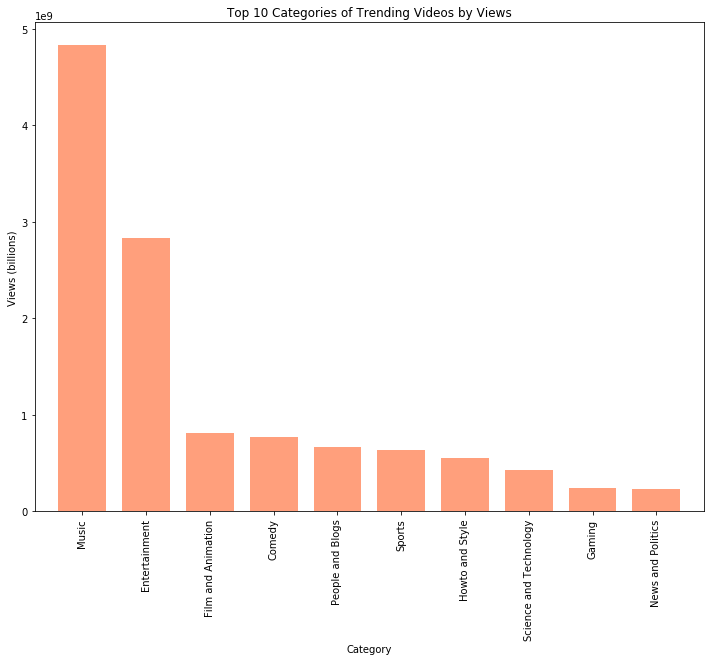

In [27]:
x_axis = np.arange(len(top_ten_cats['category_id']))
views = top_ten_cats['views']
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, top_ten_cats['category_id'], rotation=90)
plt.xlim(-0.75, len(x_axis)-.25)

plt.bar(x_axis, views, facecolor="coral", alpha=0.75, align='center', width = .75)
plt.title("Top 10 Categories of Trending Videos by Views")
plt.xlabel("Category")
plt.ylabel("Views (billions)")
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.savefig("top10cats.png")

In [30]:
ent_chans = tube_data_df.loc[tube_data_df['category_id'] == 'Entertainment']

In [31]:
ent_chans.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
55,8NHA23f7LvU,17.14.11,Jason Momoa Wows Hugh Grant With Some Dothraki...,The Graham Norton Show,Entertainment,2017-11-10T19:06:23.000Z,"Graham Norton|""Graham Norton Show Official""|""E...",1496225,16116,236,605,https://i.ytimg.com/vi/8NHA23f7LvU/default.jpg,False,False,False,I think Sarah Millican was very excited for th...
78,cOc3tsFWoRs,17.14.11,Jason Momoa & Lisa Bonet: Love at First Sight,The Late Late Show with James Corden,Entertainment,2017-11-10T09:35:00.000Z,"James Corden|""The Late Late Show""|""Colbert""|""l...",1497519,15504,353,1084,https://i.ytimg.com/vi/cOc3tsFWoRs/default.jpg,False,False,False,James congratulates Jason Momoa on recently ma...
106,yuBqWcSKrCk,17.14.11,"Owen Wilson on Meeting Julia Roberts, and Tand...",TheEllenShow,Entertainment,2017-11-10T14:00:10.000Z,"owen wilson|""owen""|""wilson""|""julia roberts""|""t...",304926,3305,130,275,https://i.ytimg.com/vi/yuBqWcSKrCk/default.jpg,False,False,False,"Movie star Owen Wilson was back on the show, a..."
117,dW4wpGg64pE,17.14.11,Meryl Streep Meets Anna Wintour at Vogue,Vogue,Entertainment,2017-11-09T18:20:27.000Z,"anna wintour|""meryl streep""|""meryl streep inte...",1017803,25122,628,1504,https://i.ytimg.com/vi/dW4wpGg64pE/default.jpg,False,False,False,The pair had a frank and far-ranging conversat...
139,vd4zwINEcLY,17.14.11,Live in the now!,poofables,Entertainment,2011-03-27T04:31:25.000Z,"cash|""Wayne's""|""World""|""wayne""|""waynes""|""fende...",95085,909,52,193,https://i.ytimg.com/vi/vd4zwINEcLY/default.jpg,False,False,False,"Stop torturing yourself man, you'll never affo..."


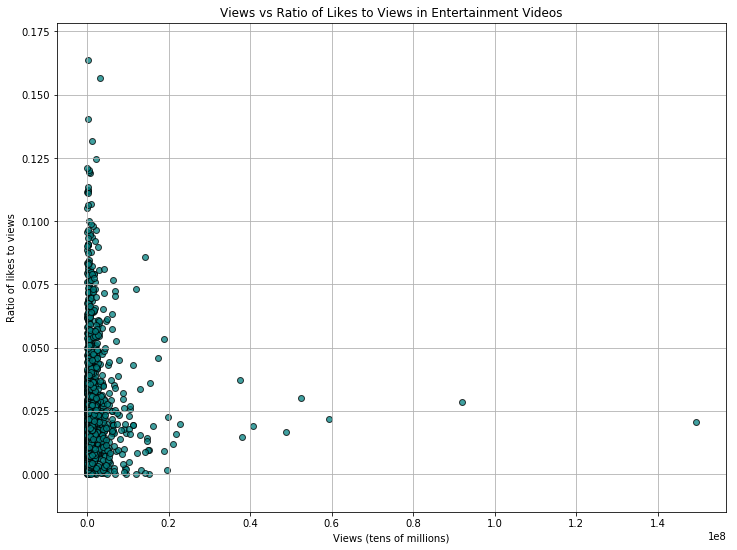

In [32]:
views = ent_chans['views']
like_ratio = ent_chans['likes']/ent_chans['views']
comment_ratio = ent_chans['comment_count']/ent_chans['views']
plt.scatter(views, like_ratio, marker="o", facecolors="teal", edgecolors="black", alpha=0.75)
fig_size = plt.rcParams["figure.figsize"]
plt.grid()
plt.title("Views vs Ratio of Likes to Views in Entertainment Videos")
plt.xlabel("Views (tens of millions)")
plt.ylabel("Ratio of likes to views")
plt.savefig("entviewlikeratio.png")

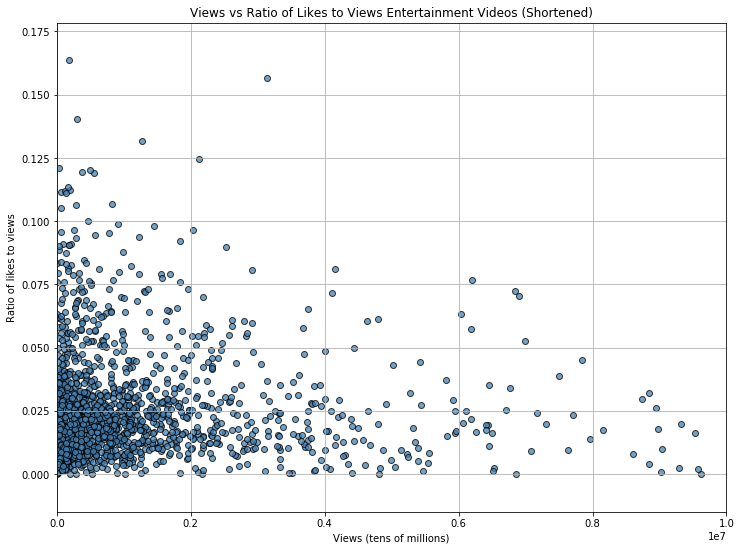

In [33]:
plt.scatter(views, like_ratio, marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
plt.grid()
plt.title("Views vs Ratio of Likes to Views Entertainment Videos (Shortened)")
plt.xlabel("Views (tens of millions)")
plt.ylabel("Ratio of likes to views")
plt.xlim(0, 10000000)
plt.savefig("entviewlikeratioshort.png")

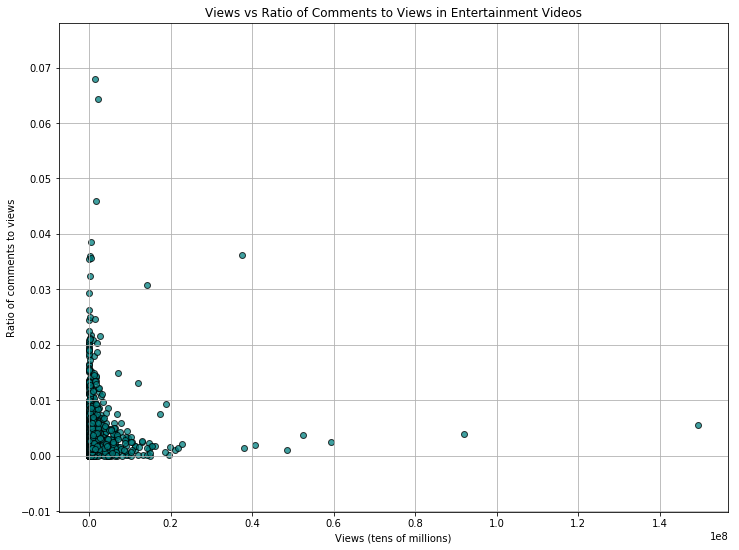

In [34]:
plt.scatter(views, comment_ratio, marker="o", facecolors="teal", edgecolors="black", alpha=0.75)
plt.grid()
plt.title("Views vs Ratio of Comments to Views in Entertainment Videos")
plt.xlabel("Views (tens of millions)")
plt.ylabel("Ratio of comments to views")
plt.savefig("entviewcommentratio.png")

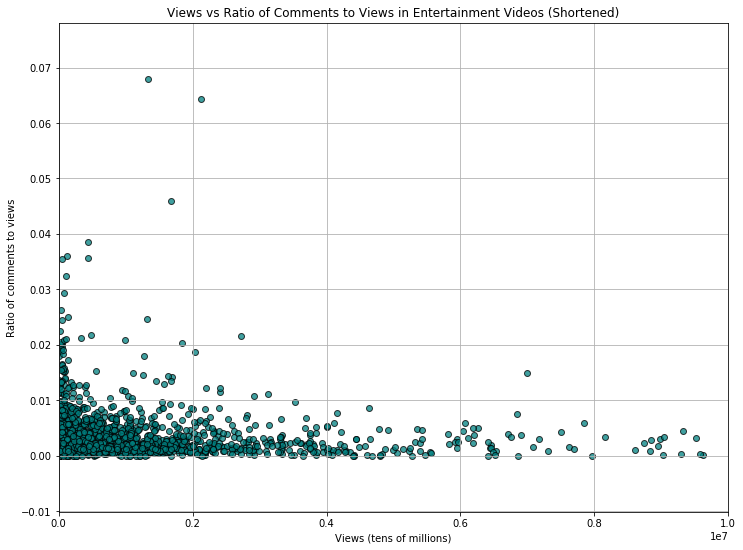

In [35]:
plt.scatter(views, comment_ratio, marker="o", facecolors="teal", edgecolors="black", alpha=0.75)
plt.grid()
plt.title("Views vs Ratio of Comments to Views in Entertainment Videos (Shortened)")
plt.xlabel("Views (tens of millions)")
plt.ylabel("Ratio of comments to views")
plt.xlim(0, 10000000)
plt.savefig("entviewcommentratioshort.png")

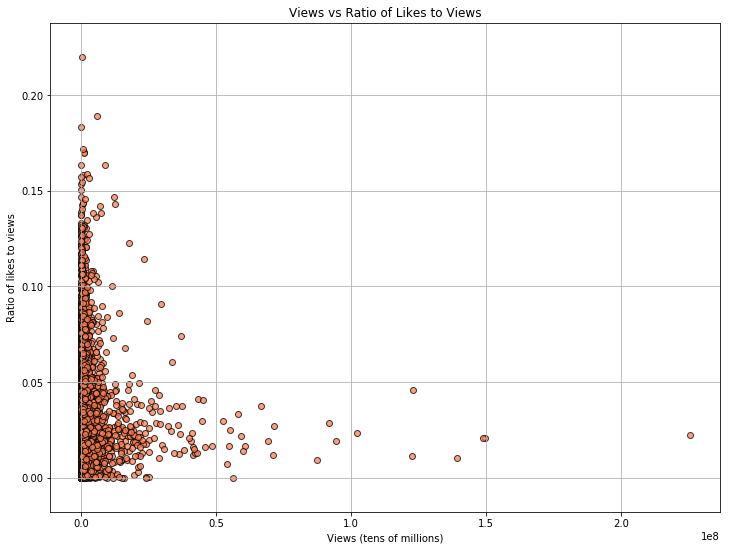

In [36]:
total_views = tube_data_df['views']
total_like_ratio = tube_data_df['likes']/tube_data_df['views']
total_comment_ratio = tube_data_df['comment_count']/tube_data_df['views']
plt.scatter(total_views, total_like_ratio, marker="o", facecolors="coral", edgecolors="black", alpha=0.75)
fig_size = plt.rcParams["figure.figsize"]
plt.grid()
plt.title("Views vs Ratio of Likes to Views")
plt.xlabel("Views (tens of millions)")
plt.ylabel("Ratio of likes to views")
plt.savefig("totalviewlikeratio.png")

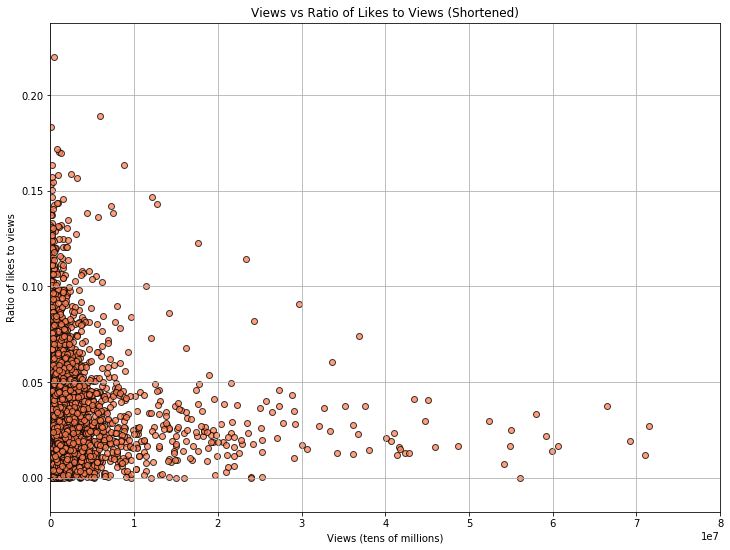

In [37]:
plt.scatter(total_views, total_like_ratio, marker="o", facecolors="coral", edgecolors="black", alpha=0.75)
fig_size = plt.rcParams["figure.figsize"]
plt.grid()
plt.title("Views vs Ratio of Likes to Views (Shortened)")
plt.xlabel("Views (tens of millions)")
plt.ylabel("Ratio of likes to views")
plt.xlim(0, 80000000)
plt.savefig("totalviewlikeratioshort.png")

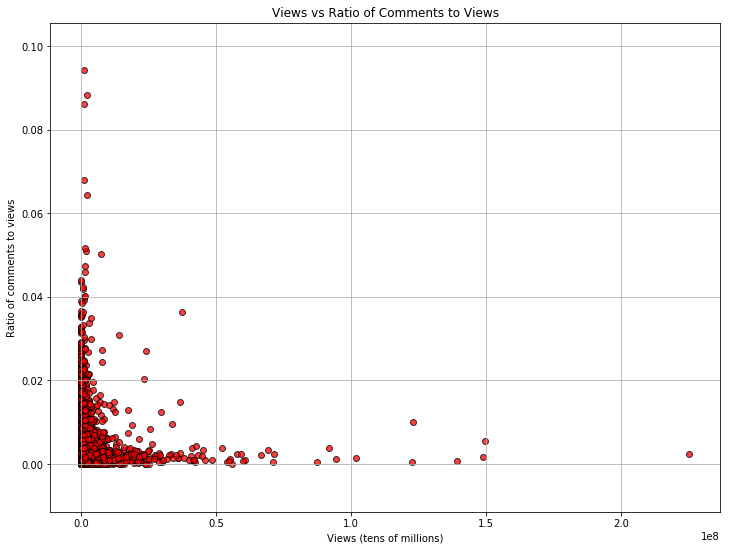

In [38]:
plt.scatter(total_views, total_comment_ratio, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
fig_size = plt.rcParams["figure.figsize"]
plt.grid()
plt.title("Views vs Ratio of Comments to Views")
plt.xlabel("Views (tens of millions)")
plt.ylabel("Ratio of comments to views")
plt.savefig("totalviewcommentratioshort.png")

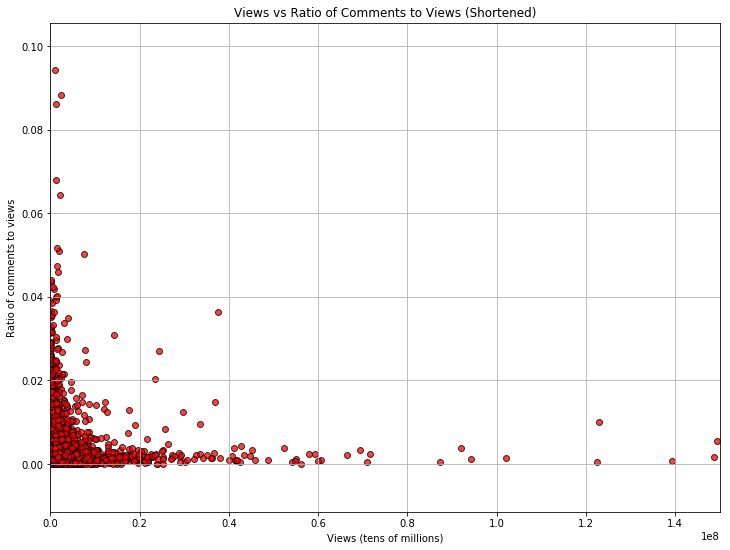

In [39]:
plt.scatter(total_views, total_comment_ratio, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
fig_size = plt.rcParams["figure.figsize"]
plt.grid()
plt.title("Views vs Ratio of Comments to Views (Shortened)")
plt.xlabel("Views (tens of millions)")
plt.ylabel("Ratio of comments to views")
plt.xlim(0, 150000000)
plt.savefig("totalviewcommentratioshort.png")